### Histograms in OpenCV
All about histograms in OpenCV

#### Histograms - 1 : Find, Plot, Analyze !!!
Learn the basics of histograms

##### 목표
Learn to

* Find histograms, using both OpenCV and Numpy functions
* Plot histograms, using OpenCV and Matplotlib functions
* You will see these functions : cv.calcHist(), np.histogram() etc.

##### Theory
그래서 히스토그램이란 무엇입니까? 히스토그램을 그래프 또는 플롯으로 생각하면 이미지의 강도 분포에 대한 전반적인 아이디어를 얻을 수 있습니다. 이것은 X 축에서 픽셀 값 (0에서 255까지의 범위, 항상은 아님)과 Y 축의 이미지에서 해당 픽셀 수를 갖는 플롯입니다.

이것은 이미지를 이해하는 또 다른 방법 일뿐입니다. 이미지의 히스토그램을 보면 이미지의 대비, 밝기, 강도 분포 등에 대한 직감을 얻을 수 있습니다. 오늘날 거의 모든 이미지 처리 도구는 히스토그램에 기능을 제공합니다. 아래는 Cambridge in Color 웹 사이트 의 이미지입니다 . 자세한 내용은 해당 사이트를 방문하시기 바랍니다

![](https://docs.opencv.org/3.4/histogram_sample.jpg)
이미지와 그 히스토그램을 볼 수 있습니다. 이 히스토그램은 컬러 이미지가 아닌 회색 음영 이미지에 사용됩니다. 히스토그램의 왼쪽 영역은 이미지에서 어두운 픽셀의 양을 표시하고 오른쪽 영역은 밝은 픽셀의 양을 보여줍니다. 히스토그램을 보면 어두운 영역이 밝은 영역 이상이고 중간 톤 (중간 범위의 픽셀 값, 약 127 정도)의 양이 매우 적음을 알 수 있습니다.

##### 히스토그램 찾기
이제 우리는 히스토그램이 무엇인지에 대한 아이디어를 얻었습니다.이를 어떻게 찾을 수 있는지 살펴볼 수 있습니다. OpenCV와 Numpy 모두이 기능을 내장하고 있습니다. 이러한 함수를 사용하기 전에 히스토그램과 관련된 용어를 이해해야합니다.

**BINS** : 위의 히스토그램은 모든 픽셀 값의 픽셀 수를 보여줍니다. 즉, 0에서 255까지입니다. 즉 위의 히스토그램을 표시하려면 256 개의 값이 필요합니다. 그러나 모든 픽셀 값의 픽셀 수를 따로 따로 구하지 않고 픽셀 값 간격의 픽셀 수를 찾을 필요가 없다면 어떻게할까요? 예를 들어, 0에서 15, 16에서 31, ..., 240에서 255 사이의 픽셀 수를 찾아야합니다. 히스토그램을 표시하려면 16 개의 값만 필요합니다. 그리고 그것은 히스토그램에 대한 OpenCV 자습서에 제공된 예제에 표시된 것입니다 .

그래서 당신은 단순히 전체 히스토그램을 16 개의 하위 파트로 나누고 각 하위 파트의 값은 모든 하위 픽셀의 합계입니다. 이 각 하위 부분을 "BIN"이라고합니다. 첫 번째 경우 빈의 수는 256 개 (각 픽셀 당 하나) 두 번째 경우는 16 개입니다 . **BINS** 는 OpenCV 문서에서 **histSize** 라는 용어로 표현됩니다 .

**DIMS** : 우리가 데이터를 수집하는 매개 변수의 수입니다. 이 경우, 우리는 단지 하나의 것, 강도 값에 관한 데이터를 수집합니다. 그래서 여기에 1입니다.

범위 : 측정하려는 강도 값의 범위입니다. 일반적으로 그것은 [0,256], 즉 모든 강도 값입니다.

###### 1.OpenCV의 히스토그램 계산
이제 cv.calcHist () 함수를 사용 하여 히스토그램을 찾습니다. 함수와 매개 변수에 익숙해 지자.

> cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

1. images : uint8 또는 float32 유형의 소스 이미지입니다. 대괄호 ( "[img]")로 표시해야합니다.
2. 채널 : 대괄호 안에도 표시됩니다. 히스토그램을 계산하는 채널의 인덱스입니다. 예를 들어 입력이 회색 명암 이미지 인 경우 그 값은 [0]입니다. 컬러 이미지의 경우 [0], [1] 또는 [2]를 전달하여 청색, 녹색 또는 적색 채널의 히스토그램을 각각 계산할 수 있습니다.
3. 마스크 : 마스크 이미지. 전체 이미지의 막대 그래프를 찾으려면 "없음"으로 표시됩니다. 그러나 특정 이미지 영역의 히스토그램을 찾으려면 마스크 이미지를 만들어 마스크로 제공해야합니다. (나중에 예제를 보여줄 것입니다.)
4. histSize : BIN 수를 나타냅니다. 대괄호로 묶여 있어야합니다. 풀 스케일의 경우 [256]을 전달합니다.
5. 범위 : 이것이 우리 범위입니다. 일반적으로 [0,256]입니다.

먼저 샘플 이미지부터 시작해 보겠습니다. 그레이 스케일 모드로 이미지를로드하고 전체 히스토그램을 찾으십시오.

###### 2. Numpy에서의 히스토그램 계산
Numpy는 또한 np.histogram () 함수를 제공합니다 . 따라서 calcHist () 함수 대신 다음 줄을 시도해 볼 수 있습니다


In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread ( 'home.jpg' , 0)
hist = cv.calcHist ([img], [0], None , [256], [0, 256])
hist_np, bins = np.histogram(img.ravel(), 256, [0, 256])

hist는 이전에 계산 한 것과 같습니다. 그러나 Numpy가 0-0.99, 1-1.99, 2-2.99 등으로 쓰레기를 계산하기 때문에 쓰레기통에 257 개의 요소가 있습니다. 따라서 최종 범위는 255-255.99가됩니다. 이를 나타 내기 위해 빈 끝에 256을 추가합니다. 하지만 우리는 256을 필요로하지 않습니다. 255까지는 충분합니다.

또한보십시오
Numpy는 또 다른 함수 인 np.bincount () 를 사용합니다 (약 10 배) np.histogram ()보다 훨씬 빠릅니다. 따라서 1 차원 히스토그램의 경우 더 잘 시도 할 수 있습니다. np.bincount에 minlength = 256을 설정하는 것을 잊지 마십시오. 예를 들어, hist = np.bincount (img.ravel (), minlength = 256)
노트
OpenCV 함수는 np.histogram ()보다 (약 40X) 빠릅니다. 그래서 OpenCV 기능을 고수하십시오.
이제 우리는 히스토그램을 계획해야하지만 어떻게해야합니까?

##### 히스토그램 그리기
이 방법에는 두 가지가 있습니다.

짧은 길 : Matplotlib 플로팅 함수 사용
긴 방법 : OpenCV 그리기 기능 사용

###### 1. Matplotlib 사용하기
Matplotlib에는 히스토그램 플롯 기능이 있습니다 : matplotlib.pyplot.hist ()

히스토그램을 직접 찾아서 그려줍니다. 히스토그램을 찾으려면 **calcHist()** 또는 **np.histogram()** 함수를 사용할 필요가 없습니다 . 아래 코드를 참조하십시오.

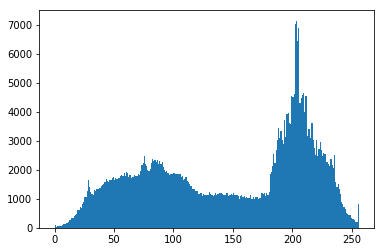

In [5]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

또는 matplotlib의 일반 플롯을 사용할 수 있습니다.이 플롯은 BGR 플롯에 유용합니다. 이를 위해서는 히스토그램 데이터를 먼저 찾아야합니다. 아래 코드를 시도하십시오.

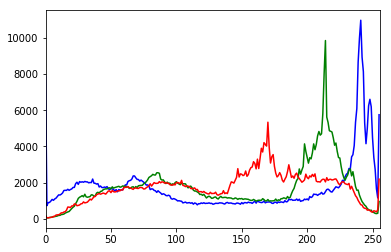

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('home.jpg')
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr,color = col)
    plt.xlim([0, 256])
plt.show()

###### 2. OpenCV 사용하기
여기서 히스토그램의 값을 bin 값과 함께 x, y 좌표와 같이 조정하여 cv.line () 또는 cv.polyline () 함수를 사용하여 위와 동일한 이미지를 생성 할 수 있습니다 . 이것은 OpenCV-Python2 공식 샘플에서 이미 사용 가능합니다. samples / python / hist.py의 코드를 확인하십시오.

#####  마스크 적용
cv.calcHist () 를 사용 하여 전체 이미지의 히스토그램을 찾습니다. 이미지의 일부 영역에 대한 히스토그램을 찾고 싶다면 어떻게해야할까요? 히스토그램을 찾으려는 영역에 흰색으로 마스크 이미지를 만들고 그렇지 않으면 검정색으로 만듭니다. 그런 다음 이것을 마스크로 전달하십시오.


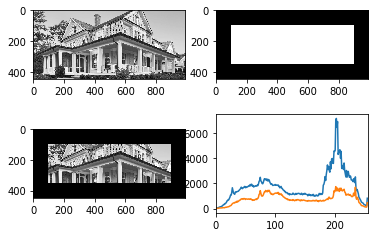

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('home.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:348, 100:890] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

##### Additional Resources
1. [Cambridge in Color website](http://www.cambridgeincolour.com/tutorials/histograms1.htm)

##### Exercises

#### Histograms - 2: Histogram Equalization
히스토그램을 평준화하여 이미지의 대비를 향상시키는 방법 배우기

##### 목표
In this section,

We will learn the concepts of histogram equalization and use it to improve the contrast of our images.

##### Thory
픽셀 값이 특정 값 범위에만 국한되어있는 이미지를 생각해보십시오. 예를 들어, 밝은 이미지의 경우 모든 픽셀이 높은 값으로 제한됩니다. 그러나 좋은 이미지는 이미지의 모든 영역에서 픽셀을 갖습니다. 따라서이 히스토그램을 어느 한쪽 끝까지 늘려야합니다 (아래 이미지, 위키 피 디아에서 제공됨). 이것이 바로 히스토그램 이퀄라이제이션입니다 (간단한 단어로). 이렇게하면 일반적으로 이미지의 대비가 향상됩니다.

![](histogram_equalization.png)

그것에 대한 자세한 내용은 [히스토그램 이퀄라이제이션 (Histogram Equalization)](https://en.wikipedia.org/wiki/Histogram_equalization)에 대한 위키피디아 페이지를 읽어 보길 권합니다 . 그것은 잘 읽은 예제를 가지고 아주 잘 설명되어 있습니다. 그래서 그것을 읽은 후에 거의 모든 것을 이해할 수 있습니다. 대신 여기 Numpy 구현을 볼 것입니다. 그 다음에는 OpenCV 기능이 표시됩니다.

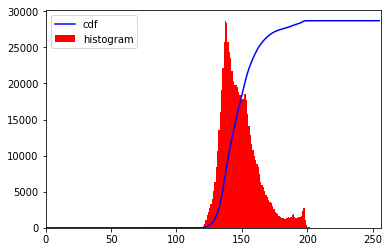

In [24]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

%matplotlib inline

img = cv.imread('wiki.jpg', 0)

hist,bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()


plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



밝은 영역에서 히스토그램 거짓을 볼 수 있습니다. 우리는 전체 스펙트럼이 필요합니다. 이를 위해 더 밝은 영역의 입력 픽셀을 전체 영역의 출력 픽셀에 매핑하는 변환 함수가 필요합니다. 그것이 히스토그램 평준화가하는 것입니다.

이제 우리는 최소 히스토그램 값 (0 제외)을 찾고 wiki 페이지에 주어진 히스토그램 등화 방정식을 적용합니다. 하지만 여기서 Numpy의 가면을 쓴 배열 개념 배열을 사용했습니다. 마스크 된 배열의 경우 모든 작업은 마스크가 적용되지 않은 요소에 대해 수행됩니다. 마스크 된 배열의 Numpy 문서에서 자세한 내용을 읽을 수 있습니다.

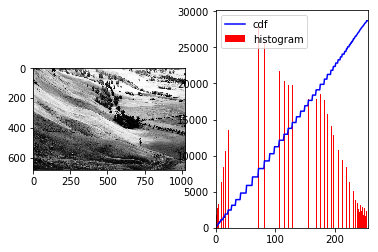

<Figure size 432x288 with 0 Axes>

In [25]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

plt.subplot(1,2,1), plt.imshow(cdf[img], cmap = 'gray')

hist,bins = np.histogram(cdf[img].flatten(), 256, [0, 256])

cdf_2 = hist.cumsum()
cdf_normalized = cdf_2 * float(hist.max()) / cdf_2.max()

plt.subplot(1,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(cdf[img].flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram', img), loc = 'upper left')

plt.show()

또 다른 중요한 특징은 이미지가 어두운 이미지 (더 밝아진 이미지 대신에 사용 된 이미지) 인 경우에도 평준화 후에 거의 동일한 이미지를 얻을 수 있다는 것입니다. 따라서 동일한 조명 조건의 모든 이미지를 만들기위한 "참조 도구"로 사용됩니다. 이것은 많은 경우에 유용합니다. 예를 들어, 얼굴 인식에서 얼굴 데이터를 학습하기 전에 얼굴의 이미지를 히스토그램 평준화하여 모두 동일한 조명 조건으로 만듭니다.

##### OpenCV의 히스토그램 이퀄라이저
OpenCV에는이를 수행하는 함수 cv.equalizeHist ()가 있습니다. 그 입력은 그레이 스케일 이미지이고 출력은 히스토그램 평등화 된 이미지입니다.

다음은 사용 된 동일한 이미지에 대한 사용법을 보여주는 간단한 코드 조각입니다.

In [26]:
import cv2 as cv
import numpy as np

img = cv.imread('wiki.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('res.png',res)

True

이제 조명 조건이 다른 여러 이미지를 가져 와서 균등하게하고 결과를 확인할 수 있습니다.

히스토그램 등화는 이미지의 히스토그램이 특정 영역에 국한되어있을 때 유용합니다. 히스토그램이 넓은 영역을 포함하는 경우 (즉 밝은 픽셀과 어두운 픽셀이 모두있는 경우) 강도가 큰 곳에서는 잘 작동하지 않습니다. 추가 자료에서 SOF 링크를 확인하십시오.

##### CLAHE (콘트라스트 제한 적응 히스토그램 이퀄라이제이션)r
우리가 방금 본 첫 번째 히스토그램 평준화는 이미지의 전체 대비를 고려합니다. 많은 경우에, 그것은 좋은 생각이 아닙니다. 예를 들어 아래 이미지는 글로벌 히스토그램 균등화 후의 입력 이미지와 결과를 보여줍니다.

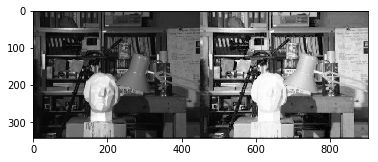

In [32]:
import cv2 as cv
import numpy as np
import bonghanUtil as util
from matplotlib import pyplot as plt

img = cv.imread('clahe.png', 0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side

plt.imshow(res, cmap = 'gray')
plt.show()


히스토그램 평준화 후에 배경 대비가 향상되었습니다. 그러나 두 이미지에서 동상의 얼굴을 비교하십시오. 우리는 과도한 밝기로 인해 대부분의 정보를 잃어 버렸습니다. 이전의 경우에서 보았 듯이 히스토그램이 특정 영역에만 국한되어 있지 않기 때문입니다 (입력 이미지의 히스토그램을 그리면 더 직관적으로됩니다).

따라서이 문제를 해결하기 위해 **적응형 히스토그램 등화** 가 사용됩니다. 이 이미지는 **"타일"이라고 불리는 작은 블록으로 나뉩니다 (tileCount는 OpenCV에서 기본적으로 8x8입니다)**. 그런 다음 각 **블록은 평소처럼 히스토그램 평준화**됩니다. 따라서 작은 영역에서는 히스토그램이 작은 영역으로 한정됩니다 (노이즈가있는 경우 제외). 소음이 있으면 증폭 될 것입니다. 이를 방지하기 위해 **대비 제한 이 적용**됩니다. 히스토그램 빈이 지정된 명암 대비 한도 (기본적으로 OpenCV에서 40)보다 높으면 **히스토그램 평준화를 적용하기 전에 해당 픽셀을 다른 빈으로 균등하게 분배**합니다. 균등화 후, 타일 경계에서 **아티팩트를 제거하기 위해 쌍 선형 보간이 적용**됩니다.

Below code snippet shows how to apply CLAHE in OpenCV:

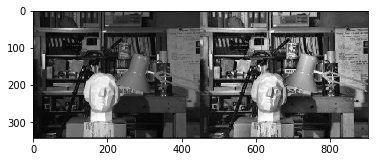

In [33]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('clahe.png', 0)

# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
cl1 = clahe.apply(img)
cv.imwrite('clahe_2.jpg',cl1)

res = np.hstack((img, cl1))

plt.imshow(res, cmap = 'gray')
plt.show()

###### Additional Resources
1. Wikipedia page on [Histogram Equalization](https://en.wikipedia.org/wiki/Histogram_equalization)
2. [Masked Arrays in Numpy](https://docs.scipy.org/doc/numpy/reference/maskedarray.html)

Also check these SOF questions regarding contrast adjustment:

3. [How can I adjust contrast in OpenCV in C?](https://stackoverflow.com/questions/10549245/how-can-i-adjust-contrast-in-opencv-in-c)
4. [How do I equalize contrast & brightness of images using opencv?](https://stackoverflow.com/questions/10561222/how-do-i-equalize-contrast-brightness-of-images-using-opencv)